# Project Setup



In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math


In [99]:
file_name = input("Enter your file name count steps: ")

data = pd.read_csv(file_name, delimiter=";")

Enter your file name count steps: ./sensor_data/orhun_walking_300.csv


Walking, running and sitting to visualize

In [100]:
data_running = pd.read_csv("../sensor_data/orhun_running_120.csv", delimiter=";")
data_walking = pd.read_csv("../sensor_data/orhun_walking_300.csv", delimiter=";")
data_standing = pd.read_csv("../sensor_data/orhun_standing.csv", delimiter=";")
data_sitting = pd.read_csv("../sensor_data/orhun_sitting.csv", delimiter=";")

# Part 1

## Exploratory Data Analysis

In [101]:
data.head()

,Date,Timestamp,DeviceOrientation,AccelerationX,AccelerationY,AccelerationZ,Label
0,2022-10-23 23:48:55,1.666558e+09,portrait,0.209457,-0.346710,-0.815460,NaN
1,2022-10-23 23:48:55,1.666558e+09,portrait,0.062744,-0.384995,-0.807693,NaN
2,2022-10-23 23:48:55,1.666558e+09,portrait,-0.158539,-0.278336,-0.782684,NaN
3,2022-10-23 23:48:55,1.666558e+09,portrait,0.302368,-0.445190,-0.681885,NaN
4,2022-10-23 23:48:55,1.666558e+09,portrait,0.250824,-0.539795,-0.697510,NaN


In [102]:
print("Data Format\n" ,data.dtypes)

Data Format
 Date                  object
Timestamp            float64
DeviceOrientation     object
AccelerationX        float64
AccelerationY        float64
AccelerationZ        float64
Label                float64
dtype: object


In [103]:
timestampSecond = (data["Timestamp"].max() - data["Timestamp"].min())
print("Activity time (s): ", timestampSecond)

Activity time (s):  178.51880311965942


## Event Analysis

### Walking



In [104]:
#Walking Data

walking_accelerationX = data_walking["AccelerationX"]
walking_accelerationY = data_walking["AccelerationY"]
walking_accelerationZ = data_walking["AccelerationZ"]

walking_time = data_walking.Timestamp - data_walking.Timestamp.min()

In [105]:
#Walking Time
walking_timestampSecond = (data_walking["Timestamp"].max() - data_walking["Timestamp"].min())
print("Activity time (s): ", walking_timestampSecond)

Activity time (s):  178.51880311965942


Text(0, 0.5, 'Acceleration (m^2/s)')

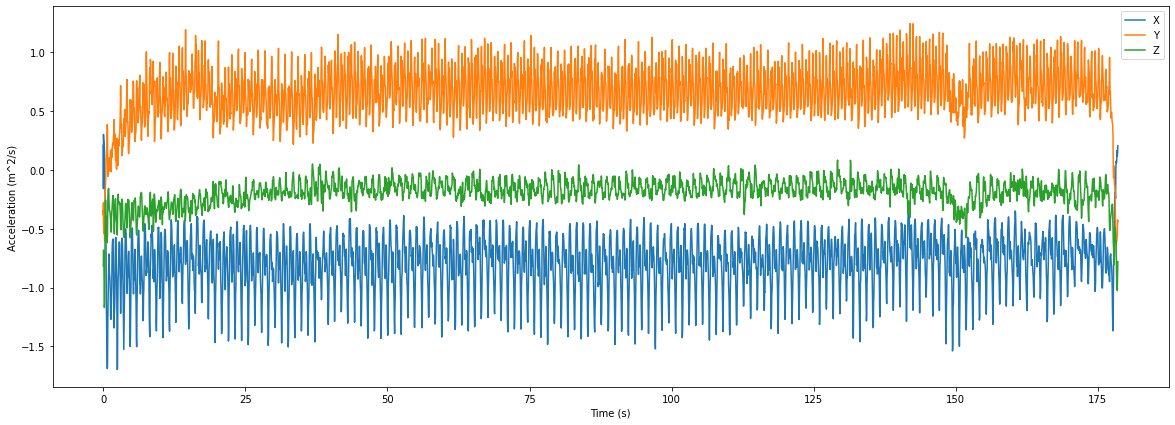

In [106]:
#Walking activity
plt.figure(figsize=(20, 7))

plt.plot(walking_time, walking_accelerationX, label="X")

plt.plot(walking_time, walking_accelerationY, label="Y")

plt.plot(walking_time, walking_accelerationZ, label="Z")

plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m^2/s)")

In [107]:
#Find total magnitude 
walking_magnitude = data_walking.apply(lambda x: np.sqrt(x["AccelerationX"]**2 + x["AccelerationY"]**2 + x["AccelerationZ"]**2), axis=1).to_numpy()

Text(0, 0.5, 'Acceleration (m^2/s)')

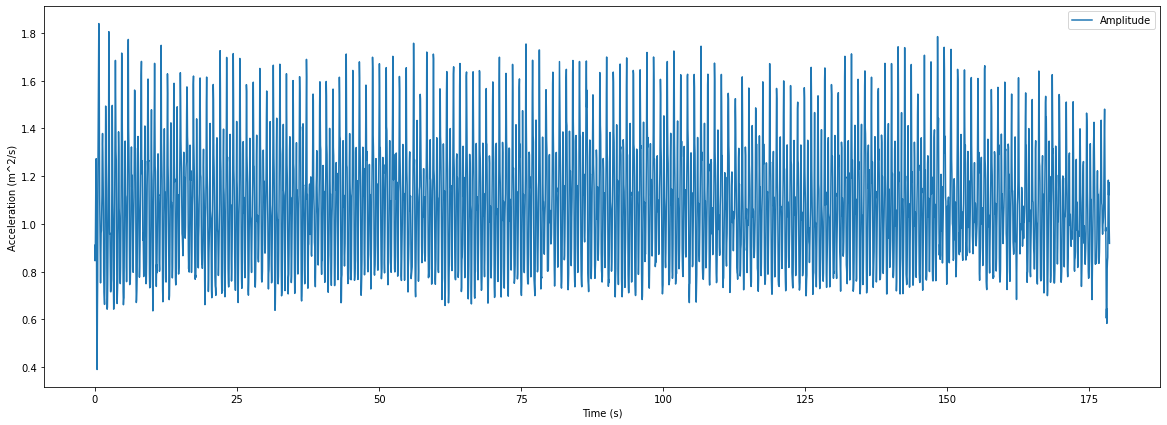

In [108]:
#Plot walking activity
plt.figure(figsize=(20, 7))

plt.plot(walking_time, walking_magnitude, label="Amplitude")

plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m^2/s)")

#### Interpretation

In the walking data we can see that there exist periodic peaks. 

With a appropriate filtering peaks that indicates walking may reveal themselves better. 

Periodic peaks can be seen as steps taken and it indicates that it can be walking





### Running



In [109]:
#Running Data

running_accelerationX = data_running["AccelerationX"]
running_accelerationY = data_running["AccelerationY"]
running_accelerationZ = data_running["AccelerationZ"]

running_time = data_running.Timestamp - data_running.Timestamp.min()

In [110]:
#Running Time
running_timestampSecond = (data_running["Timestamp"].max() - data_running["Timestamp"].min())
print("Activity time (s): ", running_timestampSecond)

Activity time (s):  49.414608001708984


Text(0, 0.5, 'Acceleration (m^2/s)')

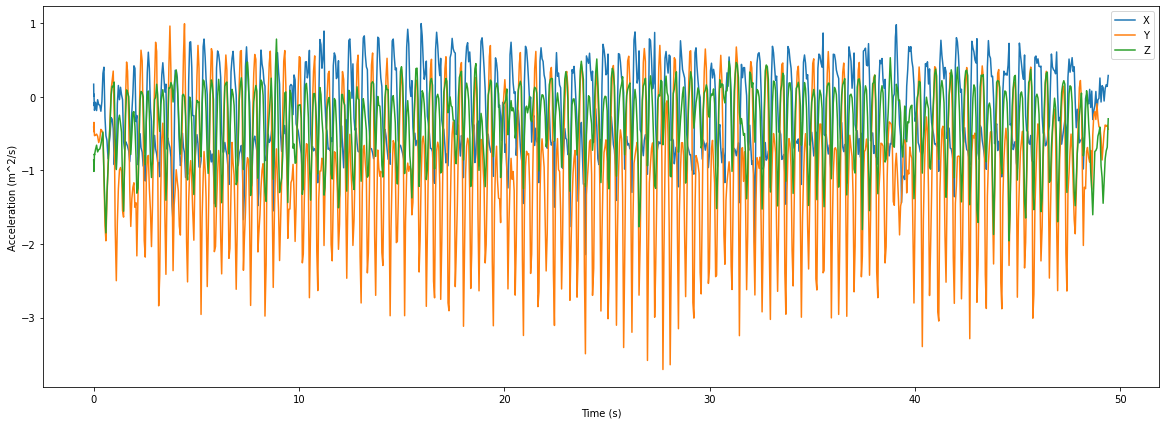

In [111]:
#Running activity
plt.figure(figsize=(20, 7))

plt.plot(running_time, running_accelerationX, label="X")

plt.plot(running_time, running_accelerationY, label="Y")

plt.plot(running_time, running_accelerationZ, label="Z")

plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m^2/s)")

In [112]:
#Find total magnitude 
running_magnitude = data_running.apply(lambda x: np.sqrt(x["AccelerationX"]**2 + x["AccelerationY"]**2 + x["AccelerationZ"]**2), axis=1).to_numpy()

Text(0, 0.5, 'Acceleration (m^2/s)')

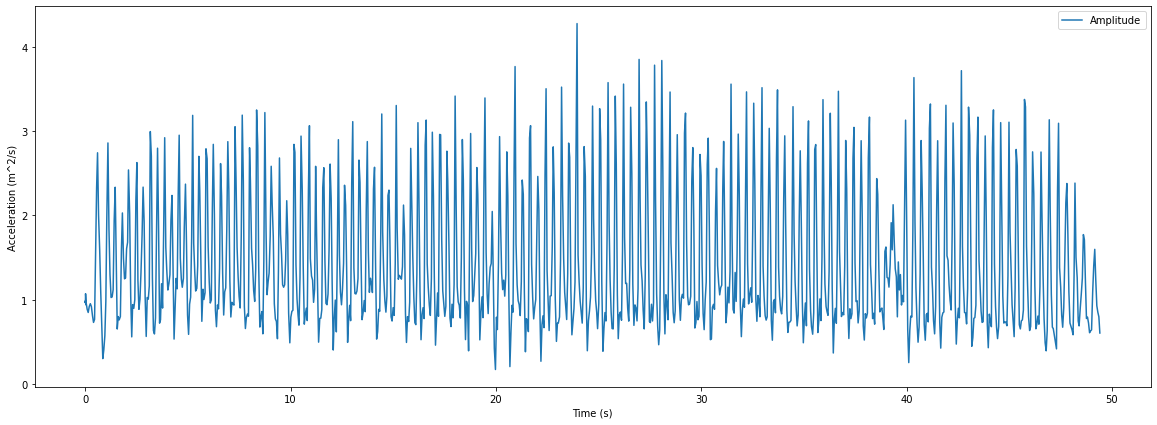

In [113]:
#Plot running activity
plt.figure(figsize=(20, 7))

plt.plot(running_time, running_magnitude, label="Amplitude")

plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m^2/s)")

#### Interpretation

In the running data there are more frequent peaks and higher than the walking data.

Even without filtering, peaks and other samples are keenly differ. It may be because there are more steps are taken in a given time while running than the walking and therefore steps may be more accurately captured within the sampling frequency.

Frequent and periodic peaks can be seen as fast steps taken and it indicates that it can be running

### Standing



In [114]:
#Standing Data
standing_accelerationX = data_standing["AccelerationX"]
standing_accelerationY = data_standing["AccelerationY"]
standing_accelerationZ = data_standing["AccelerationZ"]

standing_time = data_standing.Timestamp - data_standing.Timestamp.min()

In [115]:
#Sitting Time
standing_timestampSecond = (data_standing["Timestamp"].max() - data_standing["Timestamp"].min())
print("Activity time (s): ", standing_timestampSecond)

Activity time (s):  60.780566692352295


Text(0, 0.5, 'Acceleration (m^2/s)')

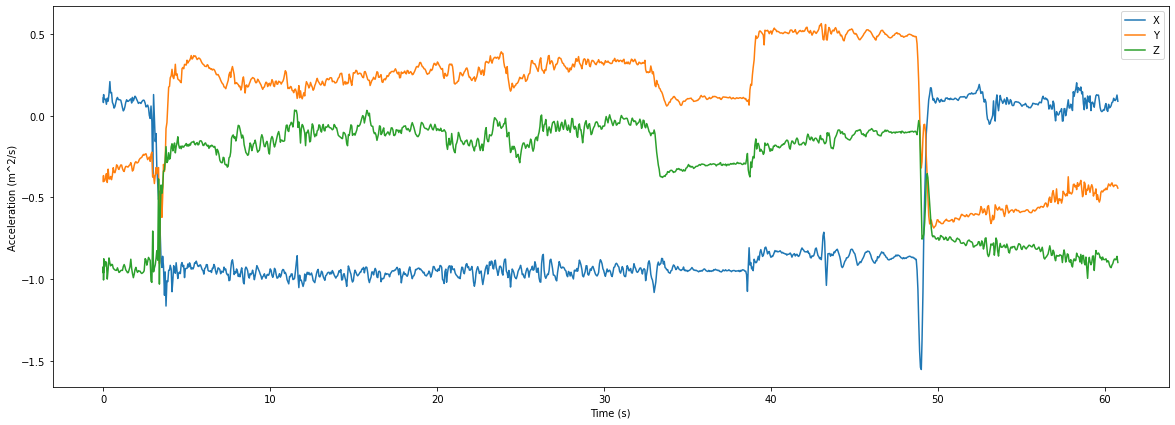

In [116]:
#Sitting activity
plt.figure(figsize=(20, 7))

plt.plot(standing_time, standing_accelerationX, label="X")

plt.plot(standing_time, standing_accelerationY, label="Y")

plt.plot(standing_time, standing_accelerationZ, label="Z")

plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m^2/s)")

In [117]:
#Find total magnitude 
standing_magnitude = data_standing.apply(lambda x: np.sqrt(x["AccelerationX"]**2 + x["AccelerationY"]**2 + x["AccelerationZ"]**2), axis=1).to_numpy()

Text(0, 0.5, 'Acceleration (m^2/s)')

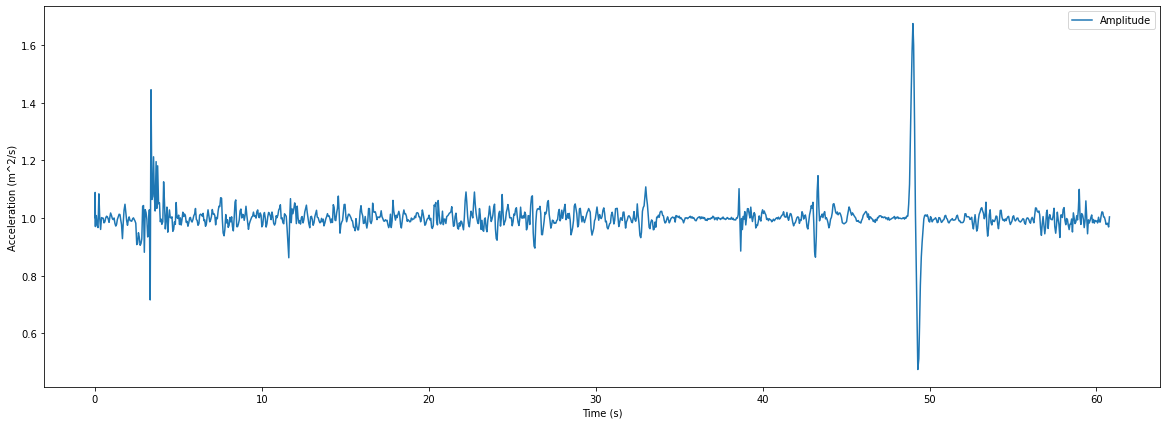

In [118]:
#Plot standing activity
plt.figure(figsize=(20, 7))

plt.plot(standing_time, standing_magnitude, label="Amplitude")

plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m^2/s)")

#### Interpretation

In standing data, there are samples that indicates movements however they are not cause sharp increases as in the walking or running.

One may try to filter appropriately to detect not natural movements during the standing.

Small peaks indicates that the person moves to a certain extent. Also, peaks do not seem periodic so it can be standing.

### Sitting



In [119]:
#Sitting Data

sitting_accelerationX = data_sitting["AccelerationX"]
sitting_accelerationY = data_sitting["AccelerationY"]
sitting_accelerationZ = data_sitting["AccelerationZ"]

sitting_time = data_sitting.Timestamp - data_sitting.Timestamp.min()

In [120]:
#Sitting Time
sitting_timestampSecond = (data_sitting["Timestamp"].max() - data_sitting["Timestamp"].min())
print("Activity time (s): ", sitting_timestampSecond)

Activity time (s):  61.370600938797


Text(0, 0.5, 'Acceleration (m^2/s)')

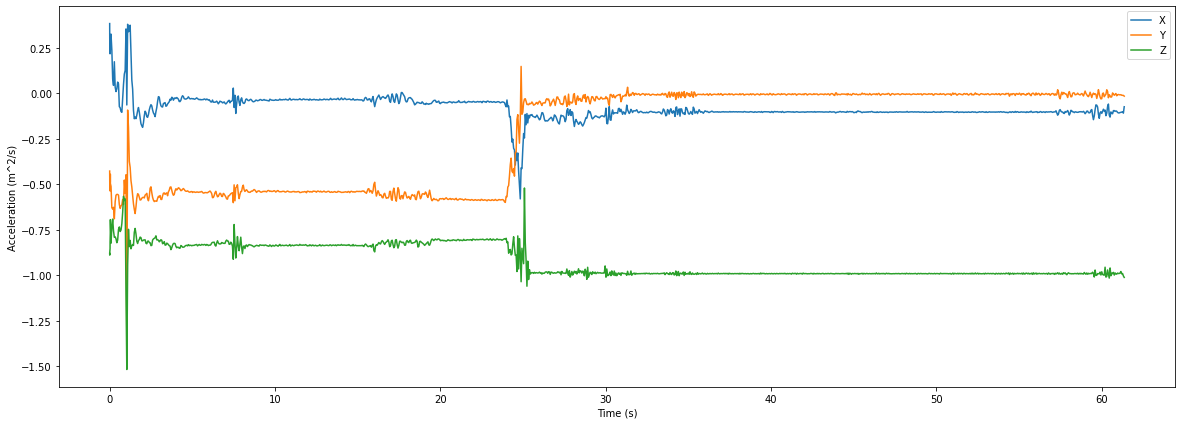

In [121]:
#Sitting activity
plt.figure(figsize=(20, 7))

plt.plot(sitting_time, sitting_accelerationX, label="X")

plt.plot(sitting_time, sitting_accelerationY, label="Y")

plt.plot(sitting_time, sitting_accelerationZ, label="Z")

plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m^2/s)")

In [122]:
#Find total magnitude 
sitting_magnitude = data_sitting.apply(lambda x: np.sqrt(x["AccelerationX"]**2 + x["AccelerationY"]**2 + x["AccelerationZ"]**2), axis=1).to_numpy()

Text(0, 0.5, 'Acceleration (m^2/s)')

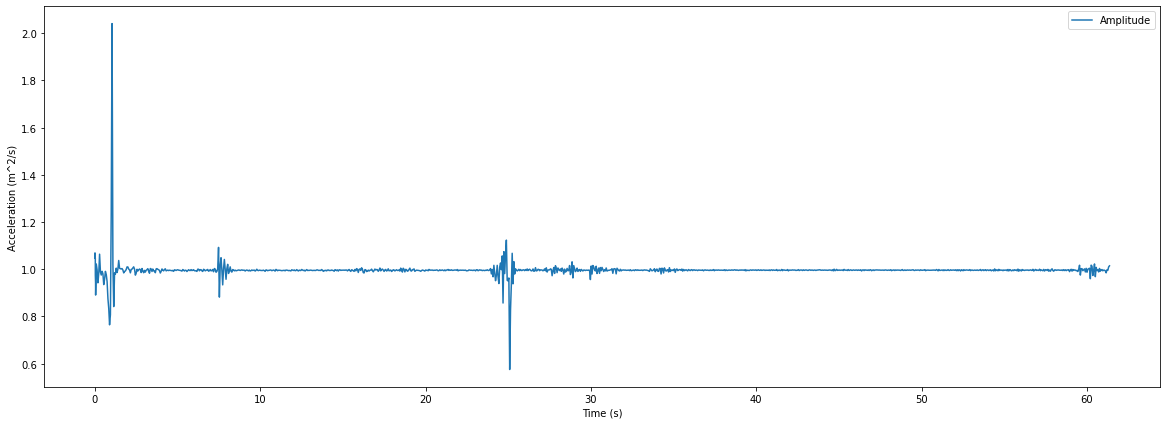

In [123]:
#Plot sitting activity
plt.figure(figsize=(20, 7))

plt.plot(sitting_time, sitting_magnitude, label="Amplitude")

plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Acceleration (m^2/s)")

#### Interpretation

In sitting data, there are nearly no peaks  throughout the monitoring.

There exist some peaks and they probably indicates some movements during sitting.

# Part 2

## Low Pass Filter and Convolution

In [124]:
#Implement a low pass filter with sinc filter and blackman window
def LPF(sampling_frequency):
    #Filter resolution
    N = 25
    n = np.arange(N)
    # Walking is around 1 hz --> 1hz/2 = 0.5 hz
    cut_off = 0.5 / sampling_frequency 
    #Blackman Window
    bw = 0.42-0.5*np.cos(2*np.pi*n/(N-1))+0.8*np.cos(4*np.pi*n/(N-1))
    # LPF
    lpf = np.sinc(2*cut_off*(n-(N-1)/2)) * bw
    #Normalization
    lpf = lpf/sum(lpf)
    return lpf

In [125]:
#Convolution --> Flip the filter and move it through the signal
#For the calculation implement the discrete convolution formula
def convolution(signal, flt):
    convolved =[]
    #For all samples + the len(flt)-1 extra movement
    for i in range(len(signal) + len(flt) - 1):
        y = 0
        #Apply disrete convolution
        for j in range(len(flt)):
            if (0 <= i-j < len(signal)):
                y += signal[i-j] * flt[j]
        convolved.append(y)
    
    conv_len = (len(convolved) - (len(flt)//2))
    return convolved[len(flt)//2: conv_len]

## Peak Finding

In [126]:
def peak_finder(filtered_signal_data, neighbour_count, hash_table):
  left_most = (neighbour_count+1)//2

  for i in range(left_most, len(filtered_signal_data) - left_most):
    peak = True
    compare_with = i - (left_most)
    
    for j in range(compare_with, (neighbour_count+1) + compare_with):
      if filtered_signal_data[i] < filtered_signal_data[j]:
        peak = False 

    if peak:
      hash_table[filtered_signal_data[i]] = peak

  return hash_table

In [127]:
def sliding_window(filtered_signal_data, size):
  hash_map = {}
  for i in range(0, len(filtered_signal_data) - size):
    map = peak_finder(filtered_signal_data[i:i+size], 2,  hash_map)
  
  total_peaks = len(hash_map.keys())
  return total_peaks

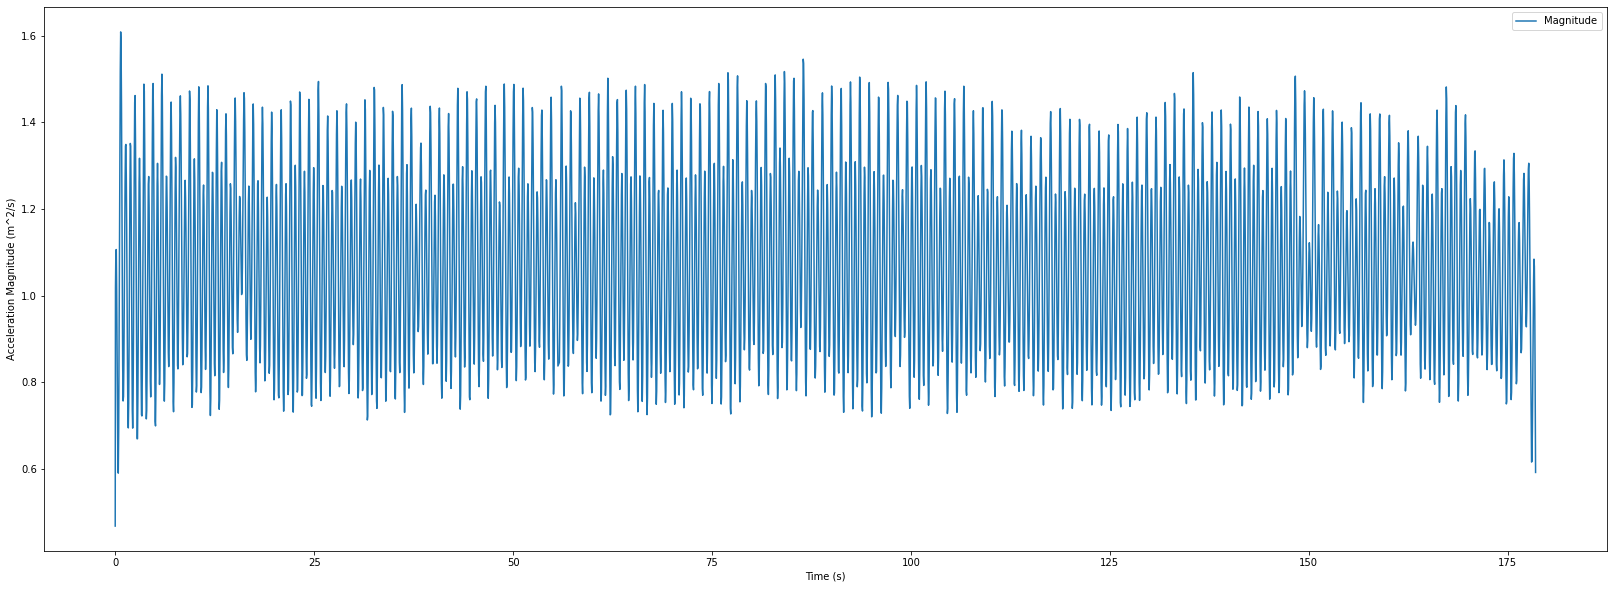

In [128]:
data_magnitude = data.apply(lambda x: np.sqrt(x["AccelerationX"]**2 + x["AccelerationY"]**2 + x["AccelerationZ"]**2), axis=1).to_numpy()
data_time = data.Timestamp - data.Timestamp.min()

#Find exact sampling frequency of the data set
sampling_freq = data.shape[0] / (data["Timestamp"].max() - data["Timestamp"].min())

#Create a low pass filter
filter = LPF(sampling_freq)

#Filter signal
filtered_signal_data = convolution(data_magnitude, filter)

plt.figure(figsize=(28, 10))
plt.plot(data_time, filtered_signal_data, label="Magnitude")


plt.xlabel("Time (s)")
plt.ylabel("Acceleration Magnitude (m^2/s)")
plt.legend()
plt.show()

In [129]:
#Find peaks
wdw_size = 30
peak_count = sliding_window(filtered_signal_data, wdw_size)
print("\n***--------------STEP-COUNT--------------***\n", "Window Size: ", wdw_size, "\n","Number of steps:", peak_count, "\n")


***--------------STEP-COUNT--------------***
 Window Size:  30 
 Number of steps: 303 

